# Naming colors

If you are shown random colors evenly spaced across the color spectrum, what percentage of those colors would the average person name red? What about green? 

English speakers in the United States were shown 80 color chips in random order in controlled lighting condtions. These 80 colors are evenly spaced across the standard Munsell array of colors. The participants were told: "There are 11 choices: black, white, red, green, blue, purple, brown, yellow, orange, pink, gray. Choose the closest color word".

This study was then repeated with Bolivian-Spanish speakers in Bolivia and Tsimane' speakers from the Amazon.

The dataset `munsell-array-fixed-choice.csv` shows the most common name in each language for each color chip.

In [ ]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'munsell-array-fixed-choice.csv'.

# from google.colab import files
# uploaded = files.upload()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("munsell-array-fixed-choice.csv")
df.head()

,grid,x,y,munsell_code,tile_hex,english_color,spanish_color,tsimane_color,spanish,tsimane
0,B1,1,7,5R8/6,#fbb6b0,pink,pink,yellow,rosada (pink),chamus (yellow)
1,D1,1,5,5R6/12,#eb6a68,pink,pink,red,rosada (pink),jainas (red)
2,F1,1,3,5R4/14,#bb1933,red,red,red,rojo (red),jainas (red)
3,H1,1,1,5R2/8,#610d25,red,red,brown,rojo (red),cafedyeisi (brown)
4,A2,2,8,10R9/2,#f2ded8,pink,white,white,blanco (white),jaibas (white)


The function below plots the 80 evenly spaced colors that each study participant was shown in random order.

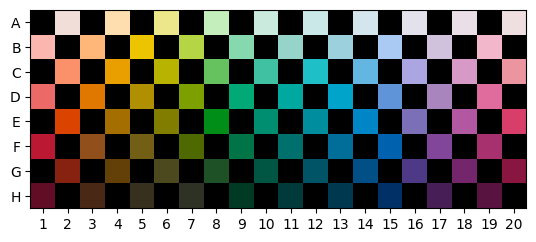

In [2]:
def plot_colors(color_column):
    fig, ax = plt.subplots()
    for idx, row in df.iterrows():
        ax.add_patch(plt.Rectangle((row['x'] - 0.5, row['y'] - 0.5), 1, 1, color=row[color_column], linewidth=0))

    ax.set_xlim(0.5, 20.5)
    ax.set_ylim(0.5, 8.5)
    ax.set_aspect('equal')
    ax.set_facecolor('black')
    ax.set_xticks(range(1, 21))
    ax.set_yticks(range(1, 9), ['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'])

plot_colors('tile_hex')

We can also use this function to plot the most common name in each language for each color chip.

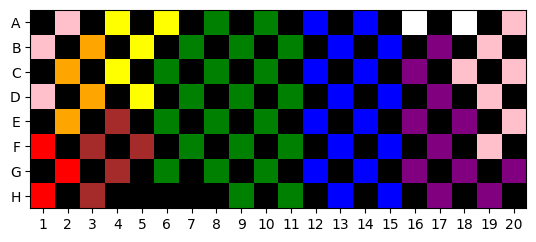

In [63]:
# Also try 'spanish_color' and 'tsimane_color'
plot_colors('english_color')

### Project Ideas:

- For each language, calculate what percentage of chips are named each color. Return dataframes for each language.

- Create a horizontal bar plot for each language. Each bar represents a color name and the length encodes the percentage of chips that are named that color.

- Is there a correlation between languages? Create scatter plots. 
	- Hint: the x-axis could be the percentage of chips for English speakers and the y-axis could be the percentage of chips for Tsimane speakers and each data point represents a color name.
	
	- You might need to `merge` dataframes.


In [16]:
# YOUR CODE HERE (add more cells as needed)

# Calculate percentage of each color and each language
# Calculate percentage of English colors
english_counts = (
    df['english_color']
    .value_counts(normalize=True)
    .mul(100) # es lo mismo que * 100, pero más explícito
    .reset_index()
    .rename(columns={'index': 'english_color', 'proportion': 'percentage'})
    .sort_values(by='percentage', ascending=False, ignore_index=True)
)

# Calculate percentage of Spanish colors
spanish_counts = (
    df['spanish_color']
    .value_counts(normalize=True)
    .mul(100)
    .reset_index()
    .rename(columns={'index': 'spanish_color', 'proportion': 'percentage'})
    .sort_values(by='percentage', ascending=False, ignore_index=True)
)

# Calculate percentage of Tsimane colors
tsimane_counts = (
    df['tsimane_color']
    .value_counts(normalize=True)
    .mul(100)
    .reset_index()
    .rename(columns={'index': 'tsimane_color', 'proportion': 'percentage'})
    .sort_values(by='percentage', ascending=False, ignore_index=True)
)


# Display the counts
english_counts, spanish_counts, tsimane_counts

(  english_color  percentage
 0         green       27.50
 1          blue       20.00
 2        purple       13.75
 3          pink       12.50
 4         brown        6.25
 5        yellow        6.25
 6        orange        5.00
 7           red        3.75
 8         black        2.50
 9         white        2.50,
    spanish_color  percentage
 0          green       27.50
 1      lightblue       13.75
 2         purple       13.75
 3           pink       10.00
 4          white        7.50
 5            red        5.00
 6         orange        5.00
 7          brown        5.00
 8         yellow        5.00
 9           blue        5.00
 10         black        2.50,
   tsimane_color  percentage
 0         green       25.00
 1          blue       15.00
 2        yellow       13.75
 3        purple       12.50
 4         white       11.25
 5           red       10.00
 6         brown        8.75
 7         black        3.75)

In [17]:
# Another option

def color_percentages(series: pd.Series) -> pd.DataFrame:
    # Return a DataFrame with color percentages
    out = (
        series.value_counts(normalize=True)
        .mul(100)
        .reset_index()
        .rename(columns={'index': series.name, 'proportion': 'percentage'})
        .sort_values(by='percentage', ascending=False, ignore_index=True)
    )
    return out

# Calculate percentages for each language
english_counts2 = color_percentages(df['english_color'])
spanish_counts2 = color_percentages(df['spanish_color'])
tsimane_counts2 = color_percentages(df['tsimane_color'])

# Display the counts
english_counts2, spanish_counts2, tsimane_counts2

(  english_color  percentage
 0         green       27.50
 1          blue       20.00
 2        purple       13.75
 3          pink       12.50
 4         brown        6.25
 5        yellow        6.25
 6        orange        5.00
 7           red        3.75
 8         black        2.50
 9         white        2.50,
    spanish_color  percentage
 0          green       27.50
 1      lightblue       13.75
 2         purple       13.75
 3           pink       10.00
 4          white        7.50
 5            red        5.00
 6         orange        5.00
 7          brown        5.00
 8         yellow        5.00
 9           blue        5.00
 10         black        2.50,
   tsimane_color  percentage
 0         green       25.00
 1          blue       15.00
 2        yellow       13.75
 3        purple       12.50
 4         white       11.25
 5           red       10.00
 6         brown        8.75
 7         black        3.75)

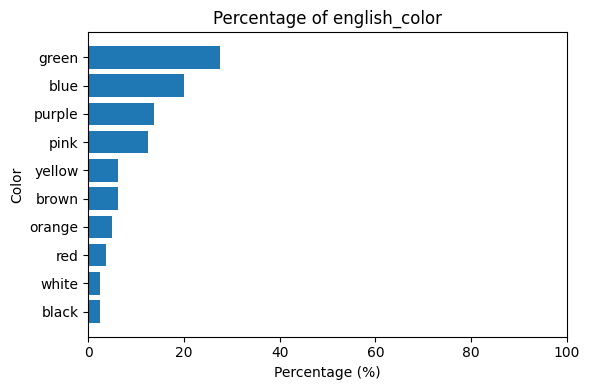

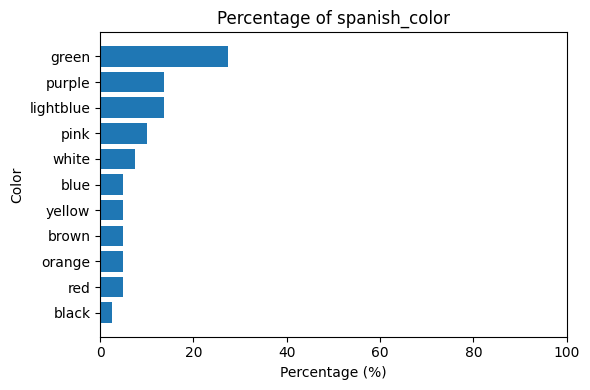

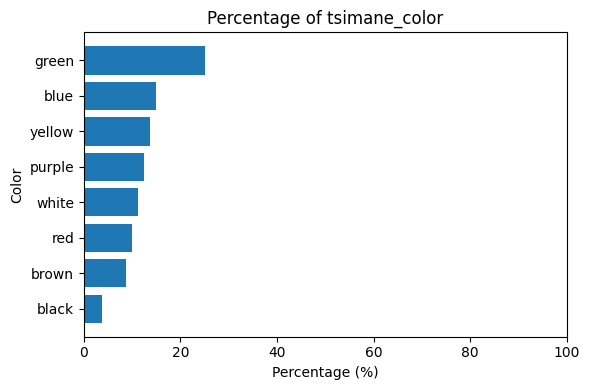

In [48]:
def plot_color_percentages(color_counts: pd.DataFrame, color_name: str):
    # Ordena de menor a mayor para que las barras crezcan hacia la derecha
    color_counts.sort_values(by='percentage', ascending=True, inplace=True)

    # Crea la figura
    plt.figure(figsize=(6, 4))

    # Dibuja las barras: y = nombres de color, x = porcentaje
    plt.barh(color_counts[color_name], color_counts['percentage'])

    # Etiquetas y títulos
    plt.xlabel('Percentage (%)')
    plt.ylabel('Color')
    plt.title(f'Percentage of {color_name}')
    plt.xlim(0, 100)  # opcional: establece el límite del eje x
    plt.tight_layout()  # opcional: mejora márgenes
    plt.show()

# Plot the color percentages for each language
plot_color_percentages(english_counts2, 'english_color')
plot_color_percentages(spanish_counts2, 'spanish_color')
plot_color_percentages(tsimane_counts2, 'tsimane_color')


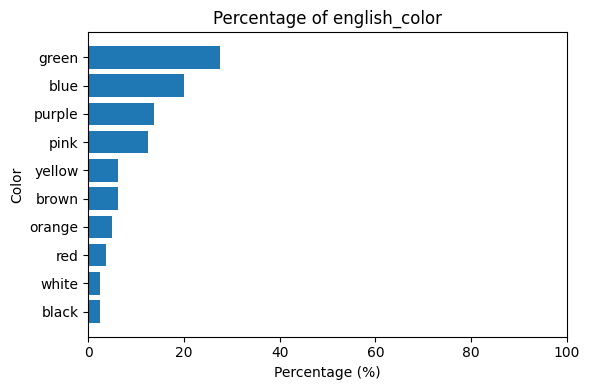

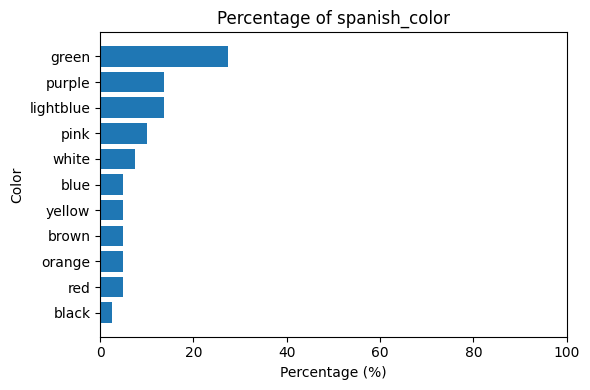

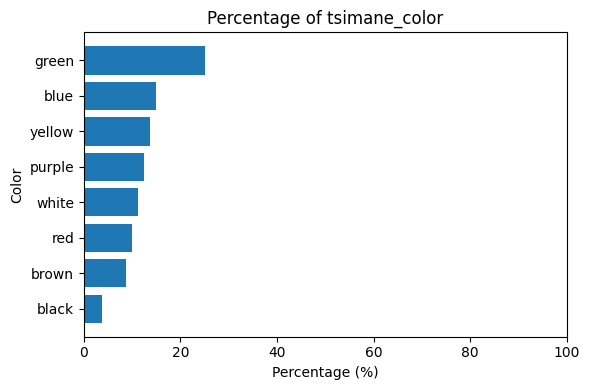

In [51]:
# Another way to do it 
def plot_color_percentages_ax(color_counts: pd.DataFrame, color_name: str):
    tmp = color_counts.sort_values(by='percentage', ascending=True)

    # Create a horizontal bar plot
    fig, ax = plt.subplots(figsize=(6, 4)) # Adjust the size as needed
    ax.barh(tmp[color_name], tmp['percentage']) 
    ax.set_xlabel('Percentage (%)')
    ax.set_ylabel('Color')
    ax.set_title(f'Percentage of {color_name}')
    ax.set_xlim(0, 100)
    fig.tight_layout()
    


    # Plot the color percentages for each language
plot_color_percentages_ax(english_counts2, 'english_color')
plot_color_percentages_ax(spanish_counts2, 'spanish_color')
plot_color_percentages_ax(tsimane_counts2, 'tsimane_color')
plt.show()


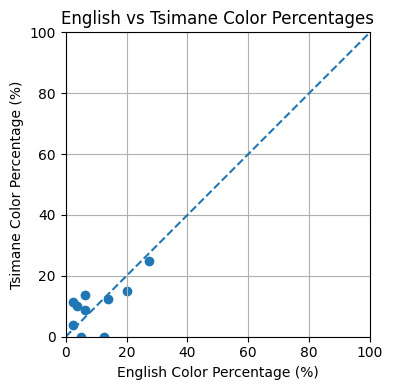

In [85]:
# Last question

# Merge the English and Tsimane color counts into a single DataFrame
en = english_counts2.rename(columns={'english_color': 'color', 'percentage': 'english_pct'})
ts = tsimane_counts2.rename(columns={'tsimane_color': 'color', 'percentage': 'tsimane_pct'})
merged_english_tsimane_df = pd.merge(en, ts, on='color', how='left').fillna(0)

# Plot the merged DataFrame in scatter plot format
plt.figure(figsize=(6, 4))
plt.scatter(merged_english_tsimane_df['english_pct'], merged_english_tsimane_df['tsimane_pct'])

# Línea y=x como referencia (igualdad de porcentajes)
plt.plot([0, 100], [0, 100], linestyle='--')
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('English Color Percentage (%)')
plt.ylabel('Tsimane Color Percentage (%)')
plt.title('English vs Tsimane Color Percentages')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()

